# Load the dataset

In [ ]:
# loading the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart_disease_detection/heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Dataset Overview
* age
* sex
* chest pain type (4 values)
* resting blood pressure normal range 120/80 mm Hg
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* Target label 0 for no disease, 1 for disease

# Data Pre-processing

In [ ]:
# find the shape of the dataset
df.shape

(1025, 14)

- The dataset has 1025 rows and 14 columns

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for null value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are no null values in the dataset

In [ ]:
# check for duplicates
df.duplicated().sum()

723

- There are 723 rows that are duplicates

In [ ]:
# drop the duplicated values

df.drop_duplicates(inplace=True)
df.shape

(302, 14)

# Exploratory data analysis

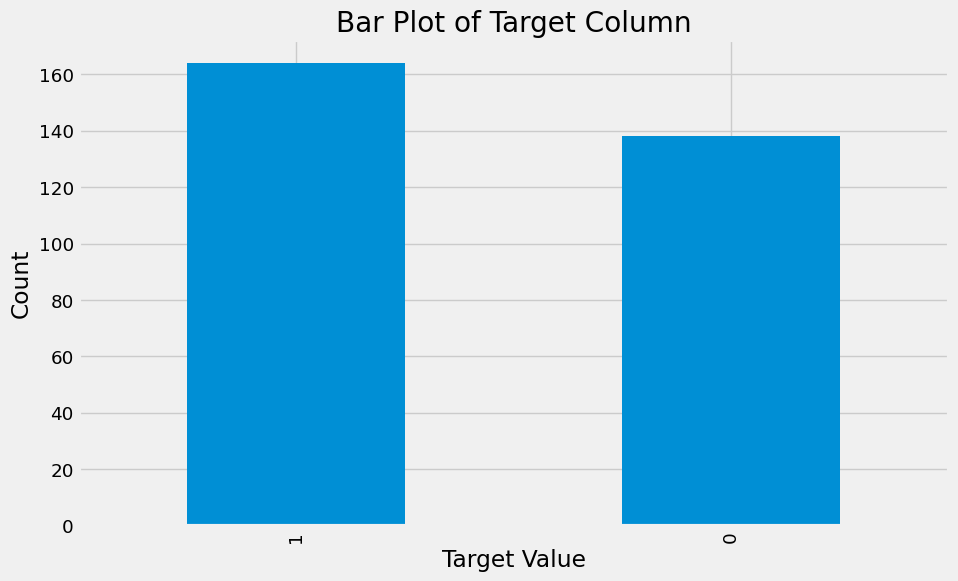

In [ ]:
import matplotlib.pyplot as plt

# Get the target column
target_column = df['target']

# Create the plot
plt.figure(figsize=(10, 6))
target_column.value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Bar Plot of Target Column')

# Show the plot
plt.show()


- The dataset is balanced dataset.

In [ ]:
# installing library for th  EDA
!pip install -q ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
import ydata_profiling

# Create a profile report
profile = ydata_profiling.ProfileReport(df)

# Display the report in a Jupyter notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# save the EDA file
profile.to_file("/content/drive/MyDrive/heart_disease_detection/heart_disease_prediction_EDA.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError



Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Selection
# Correlation matrix Plot

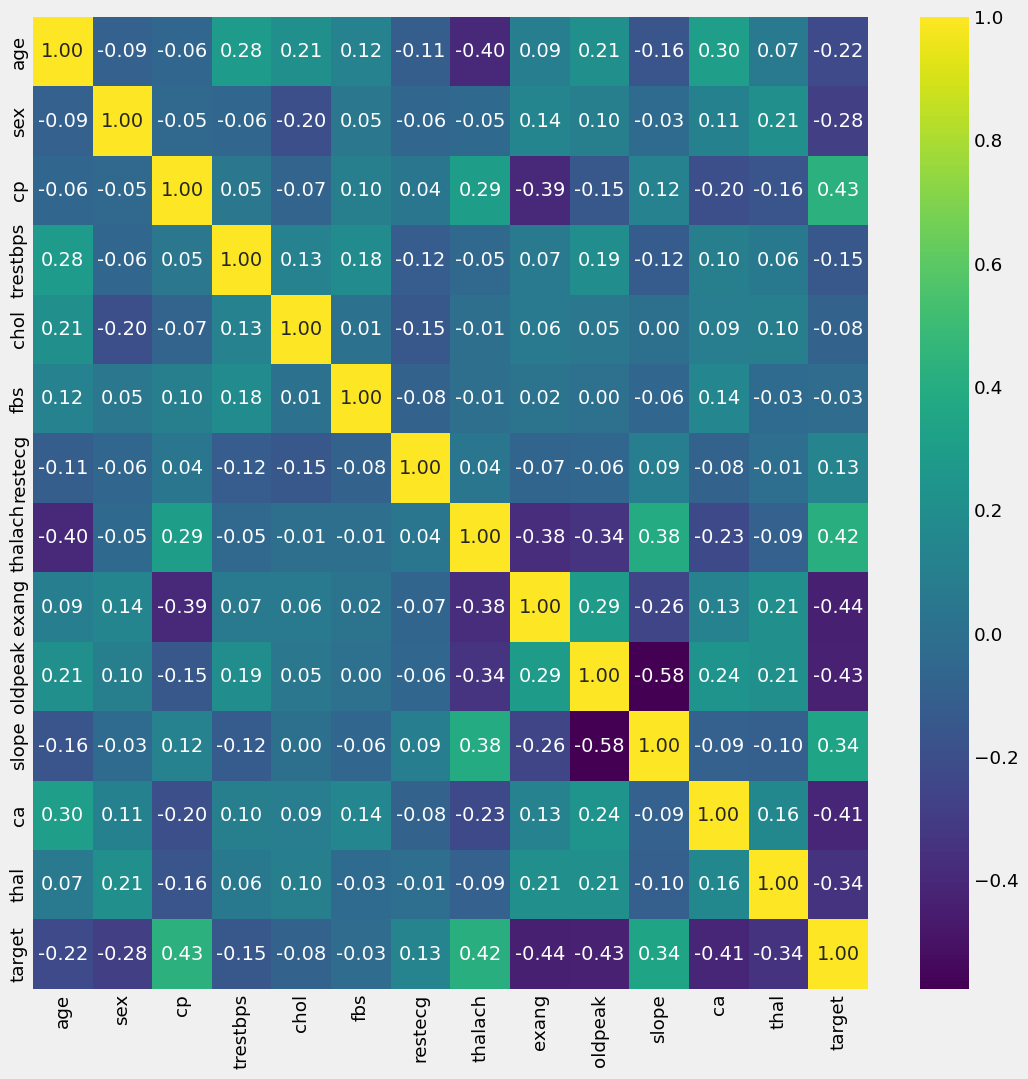

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

- all the features are not that much correlated all are below 60%.

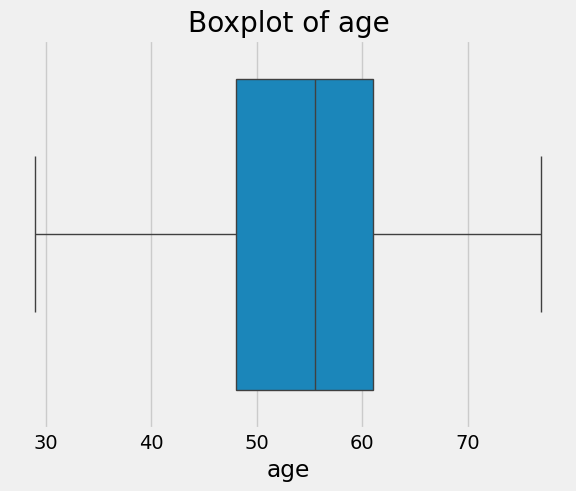

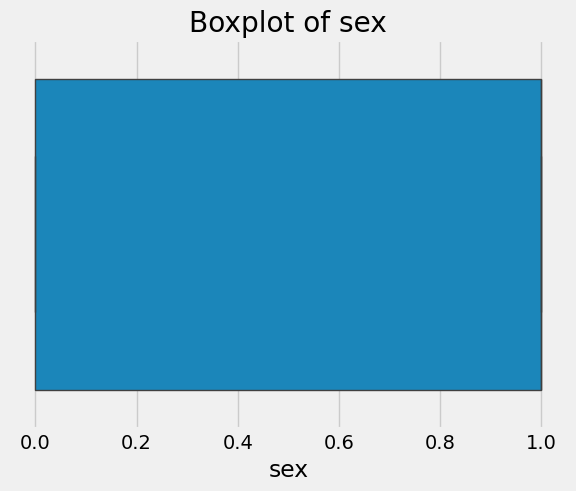

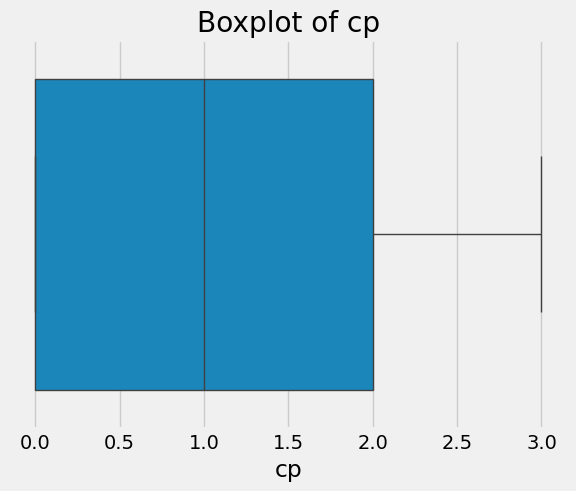

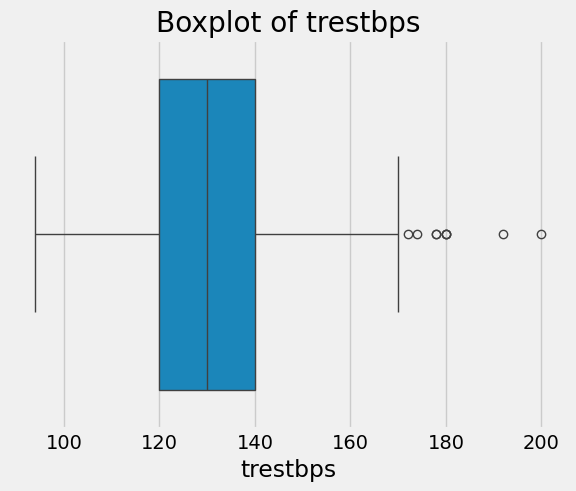

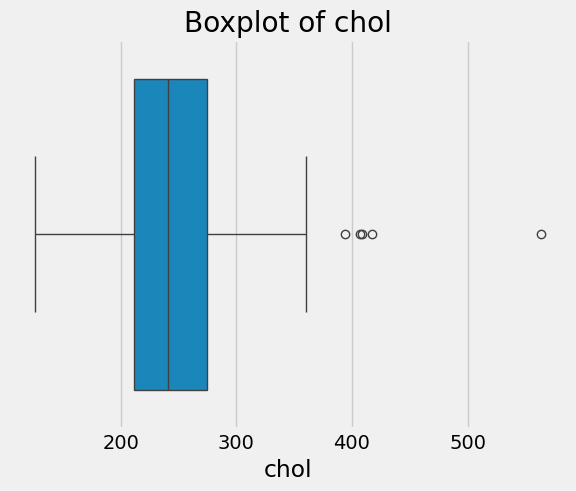

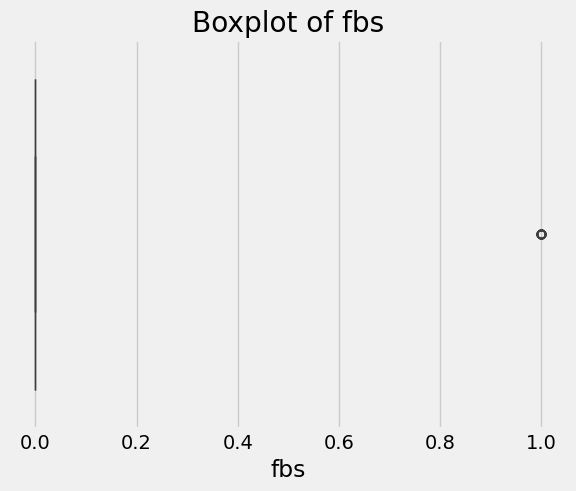

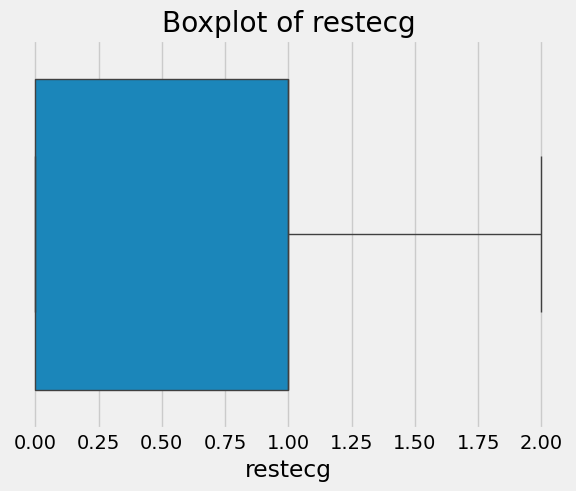

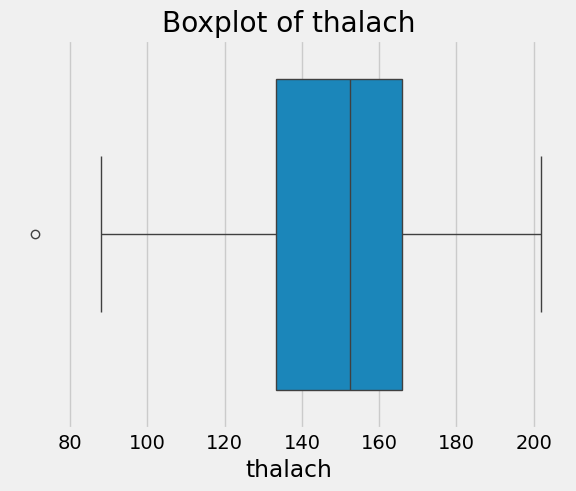

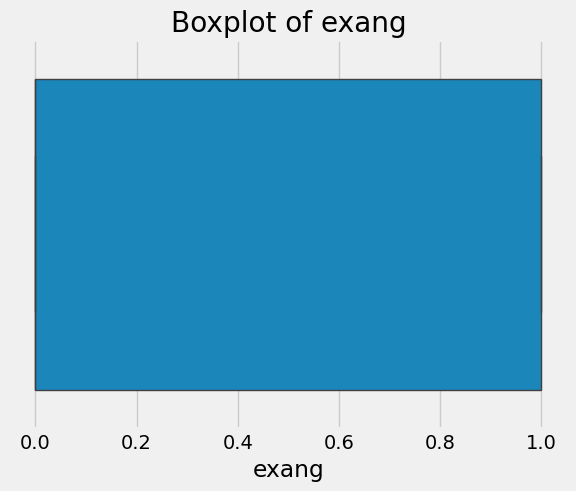

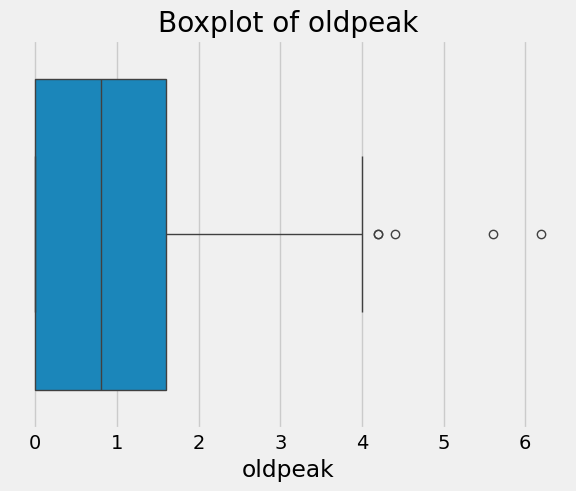

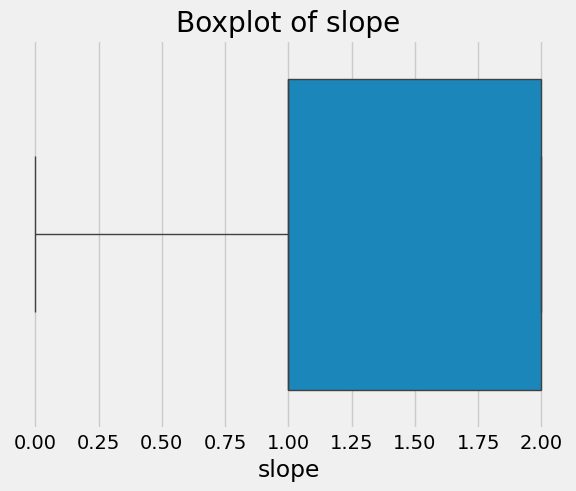

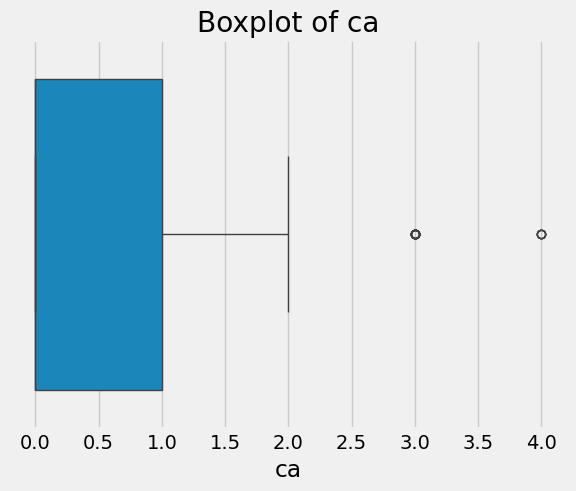

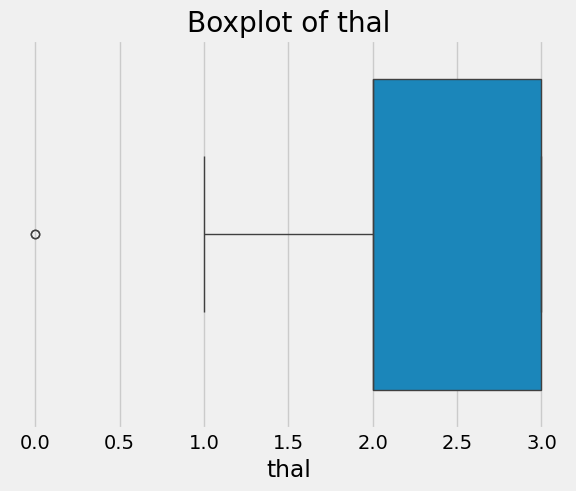

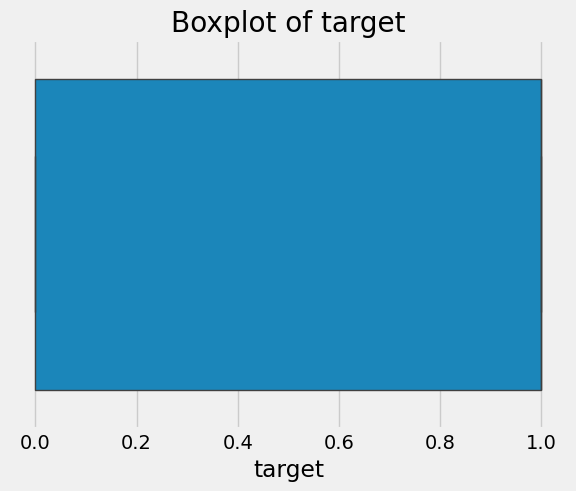

In [ ]:
# check outliers in each features

import seaborn as sns

# Create a boxplot for each feature
for column in df.columns:
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [ ]:
import numpy as np

# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each feature:\n", outliers)


Number of outliers in each feature:
 age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64


In [ ]:
# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify and remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data shape after removing outliers:", df_no_outliers.shape)


Data shape after removing outliers: (228, 14)


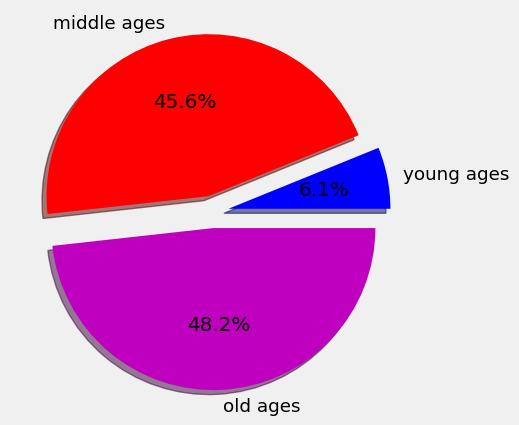

In [ ]:
# prepare pie chart for ages
young_age = df_no_outliers[df_no_outliers['age']<40]
middle_age = df_no_outliers[(df_no_outliers['age']>=40) & (df_no_outliers['age']<55)]
old_age = df_no_outliers[df_no_outliers['age']>=55]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(young_age),len(middle_age),len(old_age)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

In [ ]:
import plotly.express as px
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df_no_outliers, x='age', color= 'sex', title='Relation graph of Age and Sex')
fig.show()

- 1 label for male, 0 for female

In [ ]:
# Find the values of sex column
df_no_outliers['sex'].value_counts()

sex
1    154
0     74
Name: count, dtype: int64

In [ ]:
# calculating the percentage fo male and female value counts in the data

male_count = 154
female_count = 74

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage i the data: 67.54%
Female percentage in the data : 32.46%
Males are 108.11% more than female in the data.


In [ ]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df_no_outliers, x='age', color='cp', title='Relation between Age and CP')
fig.show()

- 0 label for typical angina
- 1 label for asymptomatic
- 2 label for non anginal
- 3 label for atypical angina


In [ ]:
# Draw the plot of age column group by Target column

fig = px.histogram(data_frame=df_no_outliers, x='age', color='target', title='Relation between Age and Target')
fig.show()

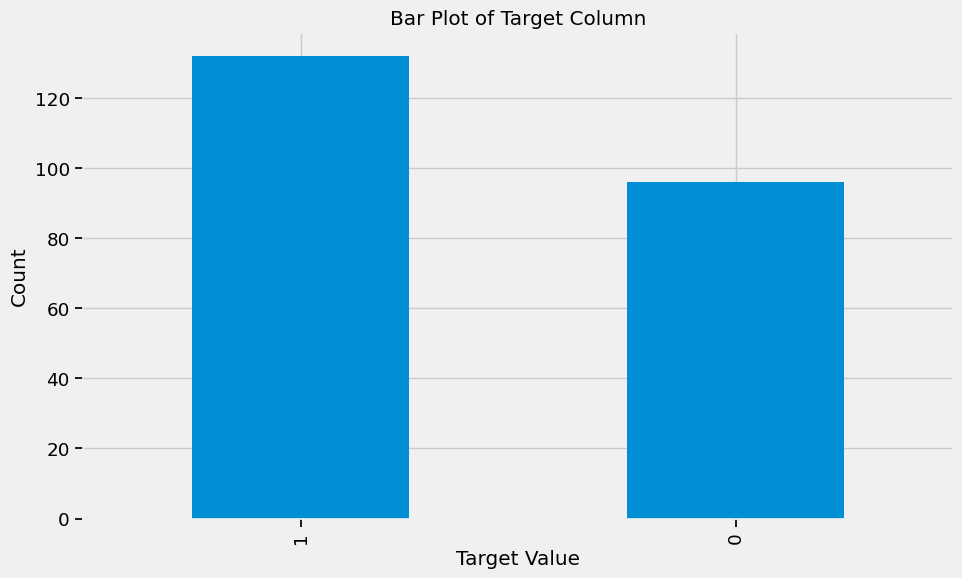

In [ ]:
# Get the target column
target_column = df_no_outliers['target']

# Create the plot
plt.figure(figsize=(10, 6))
target_column.value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Bar Plot of Target Column')

# Show the plot
plt.show()


In [ ]:
# total counts check
df_no_outliers['target'].value_counts()

target
1    132
0     96
Name: count, dtype: int64

In [ ]:
# get the value coutnts of target variable in percentagge

target_counts = df_no_outliers['target'].value_counts()
target_percentages = (target_counts / len(df_no_outliers)) * 100

print(target_percentages)


target
1    57.894737
0    42.105263
Name: count, dtype: float64


- still the dataset is balanced.

# Save the cleaned data

In [ ]:
df_no_outliers.to_csv('/content/drive/MyDrive/heart_disease_detection/heart_dataset_cleaned.csv',index=False)